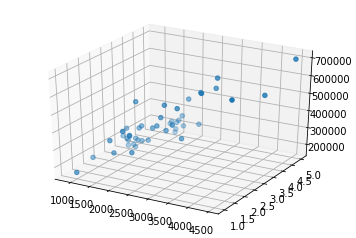

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
raw_data = np.loadtxt('ex1data2.txt', delimiter=',')
m = len(raw_data)
X = np.mat([np.ones(m), raw_data[:,0], raw_data[:,1]]).reshape(m,3)
y = np.mat(raw_data[:,2]).reshape(m,1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(raw_data[:,0], raw_data[:,1], raw_data[:,2])

# 正则化
对X进行正则化有利于梯度下降法快速收敛。

In [49]:
%matplotlib inline
scaler = StandardScaler().fit(X)
X = np.mat(scaler.transform(X))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y)

# 代价函数

In [ ]:
def J(X, y, theta):
    D = X*theta - y
    return len(theta)/2 * (D.T*D)

# 梯度下降法

In [ ]:
num_iters = 400
alpha = 0.01
theta = np.mat(np.zeros(3)).reshape(3,1)
J_history = []
for iter in range(0, num_iters):
    theta = theta - (alpha/m) * ((X*theta-y).T*X).T
    J_history.append(J(X,y,theta))
theta

# 正则方程法

In [ ]:
theta = (X.T*X).I * X.T * y
theta